In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 100
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pandas as pd
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
import nltk
import numpy as np
import collections
import networkx as nx

import numpy as np
import sklearn.cluster
import distance

# Organize NERTag Taxonomy

In [17]:
task_term_active = pd.read_csv("Terms/Kaggle_Task/active_form.csv", sep=';', header=None,names=['term', 'count', 'pos'])

In [18]:
task_term_active.head(1)

,term,count,pos
0,transmission,10,nom


In [21]:
# input list from active_form sheet
s = []
for i in task_term_active['term']:
    s.append(i.rstrip().lower()+'|')

In [ ]:
# output for VSA

In [56]:
" ".join(s)

'transmission |  virus |  risk |  disease |  infection |  health |  factor |  shed |  incubation |  include |  environmental |  control |  viral |  surface |  study |  stability |  specifically |  setting |  report |  potential |  persistence |  period |  patient |  natural |  model |  literature |  learn |  history |  exist |  effectiveness |  economic |  diagnostic |  community |  care |  woman |  virulent |  vary |  usefulness |  urine |  understand |  transmissible |  tool |  theme_transmission |  symptomatic |  susceptibility |  survival |  substrate |  strategy |  steel |  status |  stainless |  sputum |  source |  socio |  smoke |  severity |  serial |  secondary |  seasonality |  science |  role |  response |  respiratory |  reproductive |  reduce |  recovery |  range |  pulmonary |  public |  provide |  protective |  product |  process |  prevention |  prevent |  prevalence |  pregnant |  pre |  ppe |  population |  plastic |  physical |  phobic |  phenotypic |  personal |  pe

In [71]:
# Printing list using map 
#print ("Output for NERTag List:", '\n%s' % ' \n'.join(map(str, task_term_active['term'])))

In [84]:
# Printing list using map 
words = ('%s' % ' '.join(map(str, task_term_active['term'])))

In [ ]:
#https://stats.stackexchange.com/questions/123060/clustering-a-long-list-of-strings-words-into-similarity-groups

In [86]:
words = words.split(" ") #Replace this line
words = np.asarray(words) #So that indexing with a list will work

In [97]:
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])
affprop = sklearn.cluster.AffinityPropagation(affinity="precomputed", damping=0.75)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(" - *%s:* %s" % (exemplar, cluster_str))

 - *transmission:* theme_transmission, transmissible, transmission
 - *factor:* control, factor, health, history, matter, monitor, socio
 - *incubation:* adaptation, distribution, evolution, incubation, information, mitigation, population
 - *viral:* animal, behavioral, clinical, disease, fecal, high, hospitalize, human, individual, nasal, natural, steel, viral, virulent, virus, woman
 - *stability:* fatality, morbidity, seasonality, stability, stainless, susceptibility
 - *report:* effort, exist, neonate, recovery, reduce, report, respiratory, response
 - *economic:* diagnostic, dynamic, economic, epidemic, genetics, secondary
 - *care:* age, area, basic, care, change, charge, child, copper, covid, discharge, include, learn, measure, numb, ppe, pre, range, shed, source, vary
 - *urine:* determine, group, multitude, origin, provide, risk, science, substrate, surface, urine, usefulness
 - *symptomatic:* asymptomatic, symptomatic
 - *status:* datum, literature, sputum, status, strategy, 

In [112]:
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])
affprop = sklearn.cluster.AffinityPropagation(affinity="precomputed", damping=0.75)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = " | ".join(cluster)
    print('%s' % ' | '.join(map(str,(exemplar, cluster_str))).lower()+'|')


transmission | theme_transmission | transmissible | transmission|
factor | control | factor | health | history | matter | monitor | socio|
incubation | adaptation | distribution | evolution | incubation | information | mitigation | population|
viral | animal | behavioral | clinical | disease | fecal | high | hospitalize | human | individual | nasal | natural | steel | viral | virulent | virus | woman|
stability | fatality | morbidity | seasonality | stability | stainless | susceptibility|
report | effort | exist | neonate | recovery | reduce | report | respiratory | response|
economic | diagnostic | dynamic | economic | epidemic | genetics | secondary|
care | age | area | basic | care | change | charge | child | copper | covid | discharge | include | learn | measure | numb | ppe | pre | range | shed | source | vary|
urine | determine | group | multitude | origin | provide | risk | science | substrate | surface | urine | usefulness|
symptomatic | asymptomatic | symptomatic|
status | dat

In [93]:
cluster_str

'contagious, coronavirus'

In [ ]:
# use clustering for each Event Type

In [115]:
# Printing list using map 
print('%s' % ' | '.join(map(str, covid_mention)))

2019-ncov | 2019 novel coronavirus | coronavirus 2019 | coronavirus disease 19 | covid-19 | covid 19 | ncov-2019 | sars-cov-2 | wuhan coronavirus | wuhan pneumonia | wuhan virus


In [ ]:
# Read in output from above terms

In [4]:
results = pd.read_csv("C:/Users/Sarah/Documents/VIPProjects/POC/COVID/Corpus/\
vip_clean_articles_sample_batch_clean_final_v0.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
results.head(1)

,Main Company,Event Type,Date,Event Target,Extraction,Polarity,Other,Sentence,Paragraph,URL,Sentence(Inc. Annotations),Sentence_Len
0,Amenity Analytics,Care Policy,2/28/2010,Amenity Analytics,including,NEUTRAL,"{LIABILITIESEXPENSEDATA:""including"", LIABILITIESEXPENSEDATA:""measures"", ORG:""Amenity Analytics""}","The adverse events, including death, bleeding, and PTE recurrence, were also evaluated. were ana...","In this study, we compared the effi cacy and safety of the rt-PA at 50 mg/2 h with the rt-PA at ...",Elsevier,"<sa.sent><RULES rulelines=""13328_13330_13356_15260_204507_206541"" etrulelines=""47830_47832_47850...",150.0


In [8]:
# add length of sentence as variable
results['Sentence_Len'] = results['Sentence'].str.len()

In [12]:
results['Sentence_Len'].min()

9.0

In [11]:
results['Sentence_Len'].mean()

252.93403057119872

In [ ]:
results.head

In [72]:
results.sort_values('Sentence_Len', ascending=True)[['Sentence']].head(10)

,Sentence
1904,reported.
2616,Prevention
450,Data sources
1738,Weather data.
3063,Epidemic model
1963,Global response
1724,Data and Methods
493,Funding of source
3007,Modeling strategy
2804,Global Trend Model


In [23]:
results['Event Type'].unique()

array(['Care Policy', 'Economic Socioeconomic', 'General Diagnosis',
       'Information Policy', 'Pathogen Diagnosis',
       'Population Socioeconomic', 'Prevention Policy',
       'Stability Socioeconomic', 'Transmission Policy',
       'Viral Diagnosis', nan], dtype=object)

In [27]:
results.shape

(1048575, 12)

In [30]:
results.dropna(inplace=True)

In [31]:
results.shape

(3729, 12)

For Event Type: Care Policy


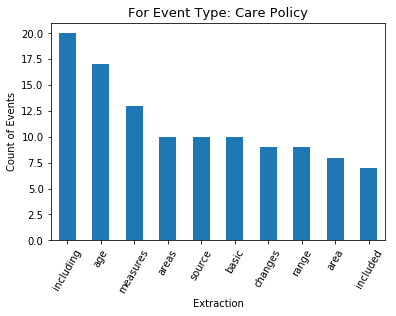

For Event Type: Economic Socioeconomic


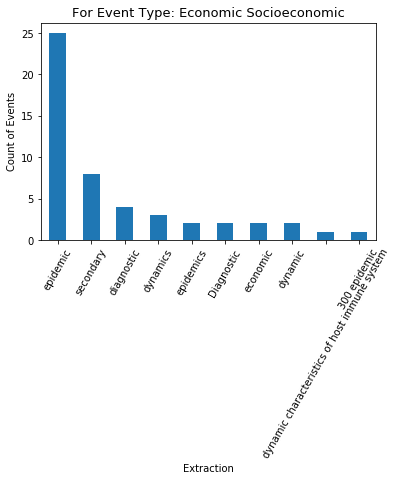

For Event Type: General Diagnosis


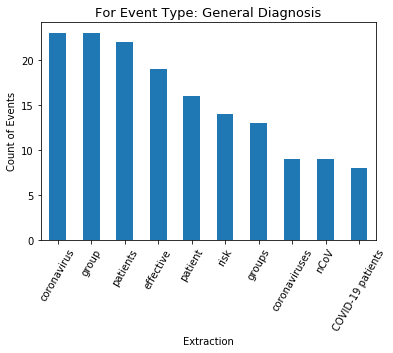

For Event Type: Information Policy


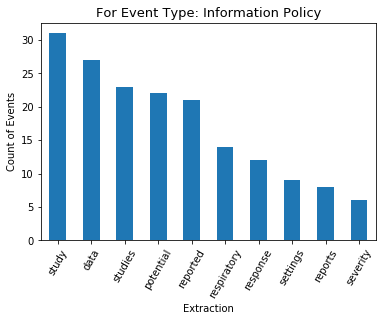

For Event Type: Pathogen Diagnosis


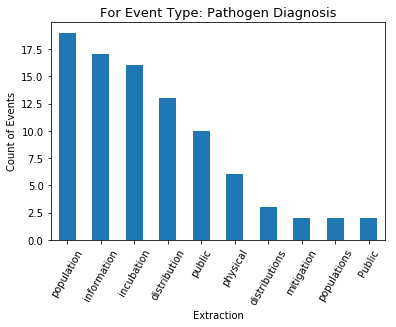

For Event Type: Population Socioeconomic


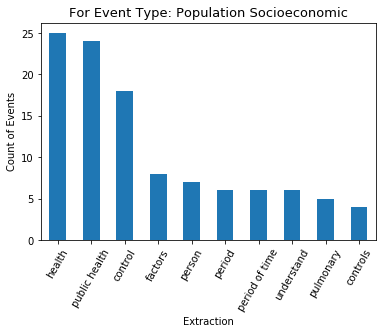

For Event Type: Prevention Policy


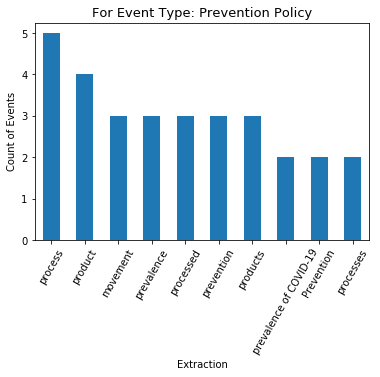

For Event Type: Stability Socioeconomic


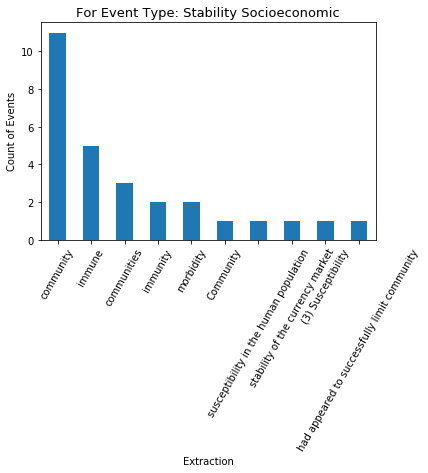

For Event Type: Transmission Policy


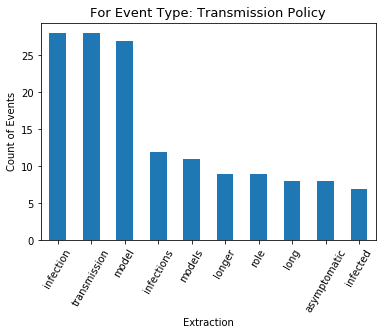

For Event Type: Viral Diagnosis


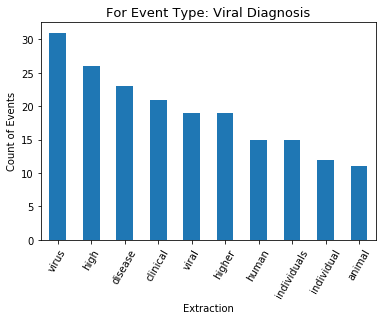

In [33]:
for i in range(len(results['Event Type'].unique())):
    print("For Event Type: " + results['Event Type'].unique()[i])
    #print(i)
    try:
        df_1 = results[results['Event Type'] == results['Event Type'].unique()[i]]
        df_2 = df_1['Extraction'].value_counts().head(10)
        df_2.plot.bar(x='index', y='Extraction', rot=60, label='Number of Extractions')
        plt.xlabel('Extraction', fontsize=10)
        plt.ylabel('Count of Events', fontsize=10)  
        plt.title("For Event Type: " + results['Event Type'].unique()[i], fontsize=13)
        plt.show()
    except TypeError:
        print('need mer dater')

In [6]:
# Defining a grammar & Parser
NP = "NP: {(<V\w+>|<NN\w?>)+.*<NN\w?>}"

chunker = RegexpParser(NP)


def get_continuous_chunks(text, chunk_func=ne_chunk):
    """
    Function from:
    https://stackoverflow.com/questions/49564176/python-nltk-more-efficient-way-to-extract-noun-phrases
    Used to identify, and extract, noun-phrases in the training text
    """
    chunked = chunk_func(pos_tag(word_tokenize(text)))
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if type(subtree) == Tree:
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

    return continuous_chunk

In [7]:
def FrequencyCounter(df, n, sub_event):
    """Function to output term frequency
    input: dataframe, sample size, Event Type
    output: frequency table of noun phrases with proportion of total extractions for the Event Type
    """
    s = pd.DataFrame(df[df['Event Type']==sub_event]['Sentence'])
    s_test =s[:n]
    freq = pd.DataFrame(s_test['Sentence'].apply(lambda sent: get_continuous_chunks(sent, chunker.parse)))
    
    wordlist = freq.Sentence.sum()
    counter = collections.Counter(wordlist)
    df_temp = pd.DataFrame(counter.most_common())
    df_temp['prop'] = df_temp[1]/df[df['Event Type']==sub_event].shape[0]
    df_temp.columns = ['Term', 'Count of Events', 'Proportion of Term in Event']
    return df_temp

In [59]:
results['Event Type'].unique()

array(['Care Policy', 'Economic Socioeconomic', 'General Diagnosis',
       'Information Policy', 'Pathogen Diagnosis',
       'Population Socioeconomic', 'Prevention Policy',
       'Stability Socioeconomic', 'Transmission Policy',
       'Viral Diagnosis'], dtype=object)

In [67]:
FrequencyCounter(results[results['Sentence'].str.contains('nursing')], 3000,'Care Policy')

,Term,Count of Events,Proportion of Term in Event
0,means taking measures,2,0.666667
1,nursing skill,2,0.666667
2,ones safety,2,0.666667
3,be integration,1,0.333333
4,nursing education,1,0.333333
5,health impacts,1,0.333333
6,nurses role,1,0.333333
7,health care,1,0.333333
8,McKinsey Global Institute,1,0.333333
9,nursing care,1,0.333333


In [68]:
FrequencyCounter(results, 3000,'Care Policy').head(5)

,Term,Count of Events,Proportion of Term in Event
0,age groups,13,0.023810
1,reproduction number,11,0.020147
2,copyright holder,11,0.020147
3,incubation period,10,0.018315
4,age group,6,0.010989


In [69]:
FrequencyCounter(results, 3000,'Economic Socioeconomic').head(5)

,Term,Count of Events,Proportion of Term in Event
0,containment strategies,4,0.050633
1,incubation period,3,0.037975
2,Hubei province,2,0.025316
3,data points,2,0.025316
4,hospital setting,2,0.025316


In [ ]:
# Connect clean data to source for rule writing

In [36]:
corpus = pd.read_csv("C:/Users/Sarah/Documents/VIPProjects/POC/COVID/Corpus/\
sentences_with_metadata.csv")

In [37]:
corpus.shape

(217389, 10)

Topics from LDA model:

[(0,
  '0.079*"•" + 0.019*"blood" + 0.015*"associated" + 0.013*"cells" + '
  '0.012*"ace2" + 0.012*"protein" + 0.011*"important" + 0.011*"levels" + '
  '0.010*"diseases" + 0.010*"cell"'),
 (1,
  '0.110*"who" + 0.088*"it" + 0.056*"response" + 0.043*"could" + 0.036*"under" '
  '+ 0.035*"available" + 0.032*"major" + 0.032*"as" + 0.030*"without" + '
  '0.024*"muscle"'),
 (2,
  '0.173*"■" + 0.020*"some" + 0.013*"drugs" + 0.010*"transmission" + '
  '0.009*"surgery" + 0.009*"must" + 0.009*"drug" + 0.009*"there" + '
  '0.008*"increased" + 0.008*"high"'),
 (3,
  '0.071*"de" + 0.036*"were" + 0.025*"patient" + 0.023*"1" + 0.022*"after" + '
  '0.018*"a" + 0.018*"more" + 0.015*"all" + 0.015*"when" + 0.014*"cause"'),
 (4,
  '0.044*"the" + 0.035*"from" + 0.028*"should" + 0.019*"other" + 0.018*"risk" '
  '+ 0.017*"oral" + 0.017*"which" + 0.017*"in" + 0.013*"use" + 0.013*"cases"'),
 (5,
  '0.069*"may" + 0.033*"can" + 0.031*"have" + 0.029*"disease" + 0.028*"dental" '
  '+ 0.022*"also" + 0.020*"has" + 0.020*"been" + 0.018*"health" + '
  '0.016*"virus"'),
 (6,
  '0.051*"la" + 0.031*"en" + 0.025*"2" + 0.023*"3" + 0.016*"que" + 0.016*"el" '
  '+ 0.016*"y" + 0.014*"los" + 0.014*"4" + 0.013*"les"'),
 (7,
  '0.045*"s" + 0.041*"et" + 0.031*"during" + 0.023*"al" + 0.022*"had" + '
  '0.021*"people" + 0.020*"à" + 0.018*"local" + 0.017*"days" + 0.016*"2020"'),
 (8,
  '0.062*"patients" + 0.030*"treatment" + 0.028*"care" + 0.020*"used" + '
  '0.014*"clinical" + 0.014*"infection" + 0.013*"common" + 0.013*"severe" + '
  '0.013*"respiratory" + 0.012*"dentistry"'),
 (9,
  '0.030*"using" + 0.020*"areas" + 0.018*"ct" + 0.014*"described" + '
  '0.014*"performed" + 0.013*"lesions" + 0.013*"above" + 0.012*"day" + '
  '0.011*"learning" + 0.011*"reactions"')]

In [70]:
corpus.head(1)

,Unnamed: 0,paper_id,cord_uid,source,publish_time,title,authors,section,sentence,cleaned_sentence
0,0,00340eea543336d54adda18236424de6a5e91c9d,szg12wfa,medrxiv,2020-03-20,Analysis Title: Regaining perspective on SARS-CoV-2 molecular tracing and its implications,"Carla Mavian, Simone Marini, Costanza Manes, Ilaria Capua, Mattia Prosperi, Marco Salemi",abstract,"During the past three months, a new coronavirus (SARS-CoV-2) epidemic has been growing exponenti...",during past three months new coronavirus sarscov2 epidemic has been growing exponentially affect...


In [ ]:
# weird stuff about horses

In [63]:
corpus[corpus['sentence'].str.contains('Abdominal radiography is more useful in foals than in adult horses.')].head(10)

,Unnamed: 0,paper_id,cord_uid,source,publish_time,title,authors,section,sentence,cleaned_sentence
163339,77107,9d118e16908ed81fea07403ca6deef78623dd14d,j9kg00qf,Elsevier,2004-12-31,3.1-Examination for Disorders of the Gastrointestinal Tract Physical Examination,"Jennifer L Davis, Samuel L Jones",body,Abdominal radiography is more useful in foals than in adult horses.,abdominal radiography more useful foals than adult horses


In [49]:
#make directory to save random sample 
%mkdir sample

In [64]:
# set different seed for new results
np.random.seed(2)
RandomCheck(corpus, 'nursing home', 30)

In [53]:
def RandomCheck(df, term, n):
    """Create a random sample of extractions to test in VIP
    input: dataframe, the event type, sample size
    output: textfile with paragraphs for number of sample size and event type specified"""
    
    chosen_idx = np.random.choice(df[df['sentence'].str.contains(term,na=False)].shape[0], replace=False, size=n)
    df_trimmed = df[df['sentence'].str.contains(term,na=False)].reset_index().iloc[chosen_idx]
    np.savetxt('sample/randomSample{0}.txt'.format(term), df_trimmed.sentence,\
               encoding="utf-8", fmt='%s', delimiter="\t")      